利用[Ames Housing dataset](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf)預測房價

## Data Clean
* Data type tranformation
* Basic Imputation
* Basic Outlier Detection

## Data Transformation
* Feature Selection
* Normality
* Advanced Imputation
* Advanced Outlier Detection

### TODO...
* [Features Important Analysis](https://www.kaggle.com/jimthompson/boruta-feature-importance-analysis)
* [Model Stacking](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/23409)
* Advanced Outlier Detection
* Hyper parameter Tunning

In [80]:
# -*- coding: utf-8 -*-

# pandas
import pandas as pd

# numpy, matplotlb, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import scipy.stats as st

In [94]:
# Import Dataset
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

df = train_df.append(test_df, ignore_index=True)
train_df.shape, test_df.shape, df.shape

((1460, 81), (1459, 80), (2919, 81))

## Baseline Model
A baseline model against to our feature engineering results.

### Preprocess

In [105]:
test_df.iloc[0]['Id']

1461

In [106]:
df.iloc[1460]['Id']

1461

In [120]:
def preScoreTest(x, y=None):
    x = pd.get_dummies(x)
    x = x.fillna(x.median())
    y = pd.get_dummies(y)
    y = y.fillna(y.median())
    common_cols = list(set(x.columns.tolist()) & set(y.columns.tolist()))
    y = y[common_cols]
    common_cols.append('SalePrice')
    x = x[common_cols]
    return x, y

In [131]:
def preScoreTest(df):
    df = pd.get_dummies(df)
    df = df.fillna(df.median())
    train = df[:1460]
    test = df[1460:]
    return train, test

In [132]:
train, test = preScoreTest(df)

In [121]:
train, test = preScoreTest(train_df, test_df)

### Modelling

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rfg = RandomForestRegressor(n_estimators=300, random_state=0, n_jobs=-1)
accuracies = cross_val_score(estimator = rfg, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.847038344571


In [134]:
rfg.fit(train.drop('SalePrice', axis=1), y=train['SalePrice'])
y_pred = rfg.predict(test.drop('SalePrice', axis=1))

In [135]:
submission = pd.DataFrame({
    'Id':test_df['Id'],
    'SalePrice':y_pred
})
submission.to_csv('sub_base', index=False)

### Data Type Transformation
* Turn numeric to categoric  
* Turn rank fields to numeric  
Some of the columns which represent property's quality be treated as numeric columns.

In [85]:
train_df['MSSubClass'] = train_df['MSSubClass'].astype('object')
train_df['MoSold'] = train_df['MoSold'].astype('object')
train_df['YrSold'] = train_df['YrSold'].astype('object')

In [86]:
test_df['MSSubClass'] = test_df['MSSubClass'].astype('object')
test_df['MoSold'] = test_df['MoSold'].astype('object')
test_df['YrSold'] = test_df['YrSold'].astype('object')

In [87]:
train_df.BsmtCond =  train_df.BsmtCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.BsmtExposure = train_df.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
train_df.BsmtQual = train_df.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.ExterCond = train_df.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.ExterQual = train_df.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.FireplaceQu = train_df.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.Functional = train_df.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
train_df.GarageCond = train_df.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.GarageQual = train_df.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.HeatingQC = train_df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.KitchenQual = train_df.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.PoolQC = train_df.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [88]:
test_df.BsmtCond =  test_df.BsmtCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.BsmtExposure = test_df.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
test_df.BsmtQual = test_df.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.ExterCond = test_df.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.ExterQual = test_df.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.FireplaceQu = test_df.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.Functional = test_df.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
test_df.GarageCond = test_df.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.GarageQual = test_df.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.HeatingQC = test_df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.KitchenQual = test_df.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.PoolQC = test_df.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

### Basic Imputation

In [137]:
# Missing data in train set
def missing_data(df):
    missing = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([missing, percent], axis=1, keys=['Missing', 'Percent'])
    return missing_data
missing = missing_data(df)
print(missing.head(25))

              Missing   Percent
PoolQC           2909  0.996574
MiscFeature      2814  0.964029
Alley            2721  0.932169
Fence            2348  0.804385
SalePrice        1459  0.499829
FireplaceQu      1420  0.486468
LotFrontage       486  0.166495
GarageFinish      159  0.054471
GarageCond        159  0.054471
GarageQual        159  0.054471
GarageYrBlt       159  0.054471
GarageType        157  0.053786
BsmtCond           82  0.028092
BsmtExposure       82  0.028092
BsmtQual           81  0.027749
BsmtFinType2       80  0.027407
BsmtFinType1       79  0.027064
MasVnrType         24  0.008222
MasVnrArea         23  0.007879
MSZoning            4  0.001370
BsmtFullBath        2  0.000685
BsmtHalfBath        2  0.000685
Utilities           2  0.000685
Functional          2  0.000685
Electrical          1  0.000343


* PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageX, BsmtX都是由於沒有(no Pool ,Miss Feature, Alley ...)，而非真的遺失因此填上"No"值。
* Electrical 只遺失一個，帶入最常見的數值

In [74]:
train_m = train_df.copy()
test_m = test_df.copy()

In [30]:
train_m['PoolQC'].fillna('No', inplace=True)
train_m['Alley'].fillna('No', inplace=True)
train_m['MiscFeature'].fillna('No', inplace=True)
train_m['Fence'].fillna('No', inplace=True)
train_m['FireplaceQu'].fillna('No', inplace=True)

train_m['Fence'].fillna('No', inplace=True)

train_m['GarageFinish'].fillna('No', inplace=True)
train_m['GarageYrBlt'].fillna('No', inplace=True)
train_m['GarageType'].fillna('No', inplace=True)
train_m['GarageCond'].fillna('No', inplace=True)
train_m['GarageQual'].fillna('No', inplace=True)

train_m['BsmtFinType2'].fillna('No', inplace=True)
train_m['BsmtExposure'].fillna('No', inplace=True)
train_m['BsmtFinType1'].fillna('No', inplace=True)
train_m['BsmtQual'].fillna('No', inplace=True)
train_m['BsmtCond'].fillna('No', inplace=True)

train_m['MasVnrArea'].fillna('No', inplace=True)
train_m['MasVnrType'].fillna('No', inplace=True)

train_m['Electrical'].fillna('SBrkr', inplace=True)

In [13]:
missing = missing_data(train_m)
print(missing.head(5))

             Missing   Percent
LotFrontage      259  0.177397
SalePrice          0  0.000000
Foundation         0  0.000000
RoofMatl           0  0.000000
Exterior1st        0  0.000000


剩下LotFrontage先以median填入，在結束資料轉換後處理。

In [90]:
missing = missing_data(test_m)
print(missing.head(25))

              Missing   Percent
PoolQC           1456  0.997944
MiscFeature      1408  0.965045
Alley            1352  0.926662
Fence            1169  0.801234
FireplaceQu       730  0.500343
LotFrontage       227  0.155586
GarageCond         78  0.053461
GarageQual         78  0.053461
GarageYrBlt        78  0.053461
GarageFinish       78  0.053461
GarageType         76  0.052090
BsmtCond           45  0.030843
BsmtQual           44  0.030158
BsmtExposure       44  0.030158
BsmtFinType1       42  0.028787
BsmtFinType2       42  0.028787
MasVnrType         16  0.010966
MasVnrArea         15  0.010281
MSZoning            4  0.002742
BsmtHalfBath        2  0.001371
Utilities           2  0.001371
Functional          2  0.001371
BsmtFullBath        2  0.001371
BsmtFinSF2          1  0.000685
BsmtFinSF1          1  0.000685


### Basic Outlier Detection

In [75]:
train_out = train_m.copy()
test_out = test_m.copy()

In [18]:
import statsmodels.api as sm
train, test = preScoreTest(train_out, test_out)
regressor = sm.OLS(train['SalePrice'], train.drop('SalePrice', axis=1)).fit()
result = regressor.outlier_test()

/home/lafes/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1804: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/lafes/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/home/lafes/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/lafes/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/lafes/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/lafes/anaconda3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:147: 

In [19]:
outlier = result['bonf(p)']
outlier = outlier[outlier<1e-3].index

In [32]:
train_out = train_out.drop(outlier, axis=0)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

train, test = preScoreTest(train_out, test_out)
rfg = RandomForestRegressor(n_estimators=300, random_state=0, n_jobs=-1)
accuracies = cross_val_score(estimator = rfg, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.888363140722


## XGBoost
Working with same model but differnet training process: XGBoost!

In [34]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
accuracies = cross_val_score(estimator = xgb, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)
print(accuracies.mean())

0.918171176421


** significant improvement by xgboost! ** 

## Data Transformation

### Feature Selection
1. Feature Generator
2. Feature Estimator

In [55]:
def rfrSelection():
    rfr = RandomForestRegressor(n_estimators=30,max_features=0.5,oob_score=True,random_state=0)
    rfr.fit(X = train.drop('SalePrice', axis=1), y = train['SalePrice'])
    importance = pd.DataFrame(rgf.feature_importances_, columns=['Importance'], index=train.drop('SalePrice', axis=1).columns)
    importance = importance.sort_values(['Importance'], ascending=False)
    return importance

In [69]:
def feature_estimator(features):
    train_f = train_out[features]
    test_f = test_out[features]
    train_f
    
    xgb = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
    accuracies = cross_val_score(estimator = xgb, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)

In [62]:
imp = rfrSelection()
for i in range(10,12):
    print(imp.iloc[0:i].index.values)

['OverallQual' 'GrLivArea' 'GarageCars' 'TotalBsmtSF' 'BsmtFinSF1'
 'GarageArea' 'YearBuilt' '1stFlrSF' 'FullBath' 'YearRemodAdd']
['OverallQual' 'GrLivArea' 'GarageCars' 'TotalBsmtSF' 'BsmtFinSF1'
 'GarageArea' 'YearBuilt' '1stFlrSF' 'FullBath' 'YearRemodAdd' 'LotArea']


In [68]:
imp.iloc[0:200].sum()

Importance    1.0
dtype: float64

## Missing Data

In [18]:
# Missing data in train set
def missing_data(df):
    missing = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([missing, percent], axis=1, keys=['Missing', 'Percent'])
    print(missing_data.head(20))
    return missing_data
train_missing = missing_data(train_df)

              Missing   Percent
PoolQC           1453  0.995205
MiscFeature      1406  0.963014
Alley            1369  0.937671
Fence            1179  0.807534
FireplaceQu       690  0.472603
LotFrontage       259  0.177397
GarageCond         81  0.055479
GarageType         81  0.055479
GarageYrBlt        81  0.055479
GarageFinish       81  0.055479
GarageQual         81  0.055479
BsmtExposure       38  0.026027
BsmtFinType2       38  0.026027
BsmtFinType1       37  0.025342
BsmtCond           37  0.025342
BsmtQual           37  0.025342
MasVnrArea          8  0.005479
MasVnrType          8  0.005479
Electrical          1  0.000685
Utilities           0  0.000000


* PoolQC, MiscFeature, Alley丟失超過90％的資料，而以上資料很可能存在於outlier之中，整欄丟棄。
* Fence, FireplaceQu, 類別選項中最低表示是NA(無fireplace)，由於pandas格式的關係被認作為遺失值，用None替代。
* LotFrontage  
利用其他columns作為輸入跑XGBoost預測遺失資料:  
CV score is: 0.899631474907  
Kaggle score: 0.12988
填入median取代mean:  
CV score is: 0.903070777961
Kaggle score: 0.12917
* Garage系列的遺失值是由於沒有車庫
* Bsmt系列也是相同
* MasVnrArea, MasVrnType由於遺失值很少，推測可能是無Masonry veneer
以上遺失值填入新增一個"NO"值的分數略低於直接將此值丟棄。
* Electrical 只遺失一個，帶入最常見的數值

### Imputation with above strategies or median?

In [17]:
def preScoreTest(x, y=None):
    x = pd.get_dummies(x)
    x = x.fillna(x.median())
    y = pd.get_dummies(y)
    y = y.fillna(y.median())
    common_cols = list(set(x.columns.tolist()) & set(y.columns.tolist()))
    y = y[common_cols]
    common_cols.append('SalePrice')
    x = x[common_cols]
    return x, y

In [20]:
train_m = train_o.copy()
test_m = test_o.copy()

In [21]:
# Too much missing(>90%)
train_m = train_m.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1)

In [22]:
# Fence
train_m['Fence'].fillna('None', inplace=True)

In [23]:
# FireplaceQu
train_m['FireplaceQu'].fillna('None', inplace=True)

In [24]:
# LotFrontage
# Using xgboost to impute missing data
null_idx = train_m.loc[train_m['LotFrontage'].isnull()].index

train_lot = train_m.copy()
test_lot = train_m.copy()
train_lot = train_lot.drop(train_lot.index[[null_idx]])
test_lot = test_lot.loc[null_idx]

x, y = preScoreTest(train_lot, test_lot)

xgb = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
xgb.fit(x.drop(['LotFrontage', 'SalePrice'], axis=1),x['LotFrontage'])
y = y.drop(['LotFrontage', 'SalePrice'], axis=1)
y_pred = xgb.predict(y)
train_m.loc[null_idx, 'LotFrontage'] = y_pred

In [25]:
"""
# GarageX
train_m['GarageFinish'].fillna('No', inplace=True)
train_m['GarageType'].fillna('No', inplace=True)
train_m['GarageCond'].fillna('No', inplace=True)
train_m['GarageQual'].fillna('No', inplace=True)
# BsmtX
train_m['BsmtFinType2'].fillna('No', inplace=True)
train_m['BsmtExposure'].fillna('No', inplace=True)
train_m['BsmtFinType1'].fillna('No', inplace=True)
train_m['BsmtQual'].fillna('No', inplace=True)
train_m['BsmtCond'].fillna('No', inplace=True)
# MassVnrX
train_m['MasVnrArea'].fillna('No', inplace=True)
train_m['MasVnrType'].fillna('No', inplace=True)"""

"\n# GarageX\ntrain_m['GarageFinish'].fillna('No', inplace=True)\ntrain_m['GarageType'].fillna('No', inplace=True)\ntrain_m['GarageCond'].fillna('No', inplace=True)\ntrain_m['GarageQual'].fillna('No', inplace=True)\n# BsmtX\ntrain_m['BsmtFinType2'].fillna('No', inplace=True)\ntrain_m['BsmtExposure'].fillna('No', inplace=True)\ntrain_m['BsmtFinType1'].fillna('No', inplace=True)\ntrain_m['BsmtQual'].fillna('No', inplace=True)\ntrain_m['BsmtCond'].fillna('No', inplace=True)\n# MassVnrX\ntrain_m['MasVnrArea'].fillna('No', inplace=True)\ntrain_m['MasVnrType'].fillna('No', inplace=True)"

In [26]:
# Electrical
train_m['Electrical'].fillna('SBrkr', inplace=True)

In [27]:
train, test = preScoreTest(train_m, test_m)

In [28]:
xgb = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
accuracies = cross_val_score(estimator = xgb, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.899627276977


In [29]:
xgb.fit(train.drop('SalePrice', axis=1), y=train['SalePrice'])
y_pred = xgb.predict(test)
submission = pd.DataFrame({
    'Id':test_df['Id'],
    'SalePrice':y_pred
})
submission.to_csv('sub_missing', index=False)

## How about Linear Regression?


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [31]:
train_lr = train_m.copy()
test_lr = test_m.copy()

In [32]:
train, test = preScoreTest(train_lr, test_lr)

In [33]:
# Feature selection by sklearn
selector = SelectKBest(f_regression, k=40)
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
selector.fit(train.drop('SalePrice', axis=1), train['SalePrice'])

SelectKBest(k=40, score_func=<function f_regression at 0x7f583ba6c598>)

In [34]:
mlr = LinearRegression()
X = train[selector.get_support(indices=True)]
mlr.fit(X, y)
accuracies = cross_val_score(estimator = mlr, X = X, y = y, cv = 5, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.803431043118


There exist a huge performance gap compare linear regression with xgboost...

## Multicollinearity

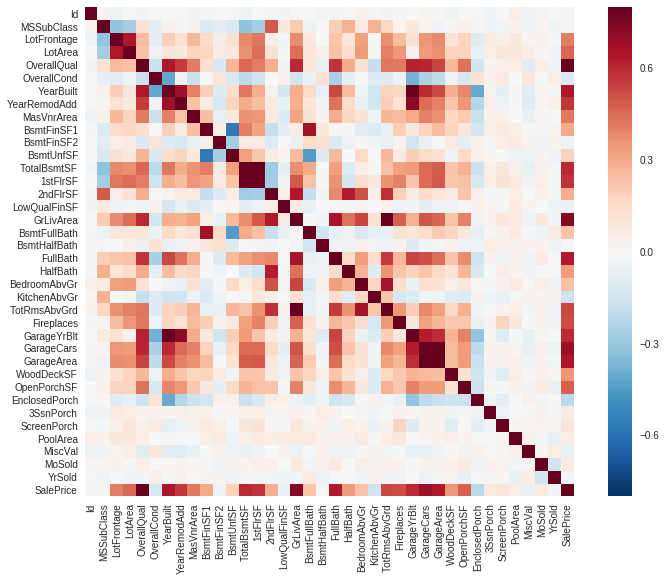

In [35]:
# Visiualize correlation matrix with heatmap
corrmat = train_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [36]:
# Inspect of multicollinearity(>0.8) with categorical variables
def coLinear(corrmat, rate):
    corrDict = {}
    for c in corrmat.columns.tolist():
        corrList = corrmat.loc[corrmat[c]>rate].index.tolist()
        corrList.remove(c)
        if corrList:
            corrDict[c] = corrList
    return corrDict
coLinear(corrmat, 0.8)

{'1stFlrSF': ['TotalBsmtSF'],
 'GarageArea': ['GarageCars'],
 'GarageCars': ['GarageArea'],
 'GarageYrBlt': ['YearBuilt'],
 'GrLivArea': ['TotRmsAbvGrd'],
 'OverallQual': ['SalePrice'],
 'SalePrice': ['OverallQual'],
 'TotRmsAbvGrd': ['GrLivArea'],
 'TotalBsmtSF': ['1stFlrSF'],
 'YearBuilt': ['GarageYrBlt']}

In [37]:
train_co = train_m.copy()
test_co = test_m.copy()

In [38]:
# duplicate variables
train_co = train_co.drop(['TotalBsmtSF'], axis=1)

In [39]:
# Coolumn 'GarageCars' contains in GarageArea
train_co = train_co.drop(['GarageCars'], axis=1)

In [40]:
#These two columns cause perforamce decreased after dropping them.
train_co = train_co.drop(['GarageYrBlt'], axis=1)
train_co = train_co.drop(['TotRmsAbvGrd'], axis=1)

In [41]:
train, test = preScoreTest(train_co, test_co)

In [42]:
xgb = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
accuracies = cross_val_score(estimator = xgb, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.901679895619


## Normality
Lots of statistic test(z, t, chi2, f...) has normal distribution asuumption.

In [43]:
train_normal = train_co.copy()
test_normal = test_co.copy()

In [44]:
# Test with skewness
numeric_cols = [f for f in train_normal if train_normal.dtypes[f] != 'object']
train_normal[numeric_cols].skew()

Id                0.000000
LotFrontage       1.890462
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
1stFlrSF          1.376757
2ndFlrSF          0.813030
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
Fireplaces        0.649565
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
ScreenPorch       4.122214
MiscVal          24.476794
SalePrice         1.882876
dtype: float64

In [45]:
from scipy.stats import kstest
skew_cols = []
for col in numeric_cols:
    d, p = kstest(train_normal[col], 'norm')
    if d<0.6:
        skew_cols.append(col)

/home/lafes/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/lafes/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/lafes/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [46]:
skew_cols = train_normal[skew_cols].columns[abs(train_normal[skew_cols].skew()) > 1]

In [47]:
train_normal[skew_cols] = np.log1p(train_normal[skew_cols])
test_normal[skew_cols] = np.log1p(test_normal[skew_cols])

In [48]:
train, test = preScoreTest(train_normal, test_normal)

In [49]:
xgb = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
accuracies = cross_val_score(estimator = xgb, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.901696495317


In [50]:
xgb.fit(train.drop('SalePrice', axis=1), y=train['SalePrice'])
y_pred = xgb.predict(test)
submission = pd.DataFrame({
    'Id':test_df['Id'],
    'SalePrice':y_pred
})
submission.to_csv('sub_normality', index=False)

## Outlier

### Univariate Analysis

In [51]:
from sklearn.preprocessing import StandardScaler

saleprice_scaled = StandardScaler().fit_transform(train_df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[ 3.82897043]
 [ 4.04098249]
 [ 4.49634819]
 [ 4.71041276]
 [ 4.73032076]
 [ 5.06214602]
 [ 5.42383959]
 [ 5.59185509]
 [ 7.10289909]
 [ 7.22881942]]


/home/lafes/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


2 outer range point(7.x) may be the potential outlier.

### Bivariate Analysis

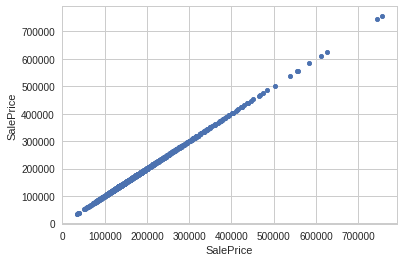

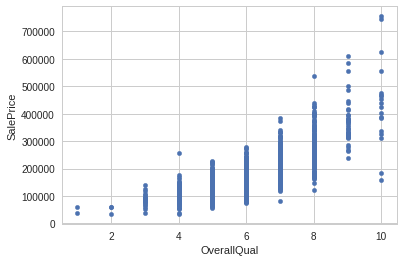

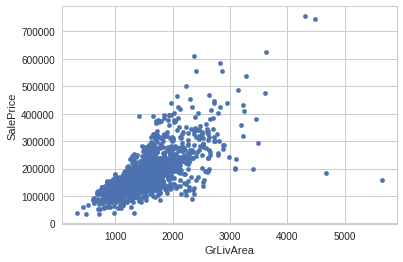

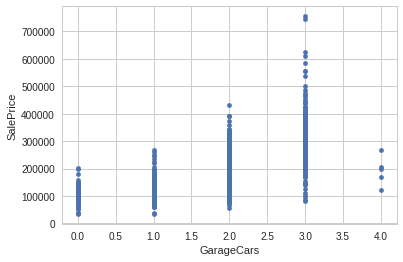

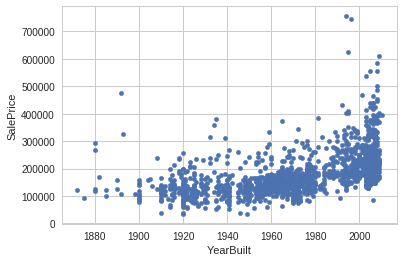

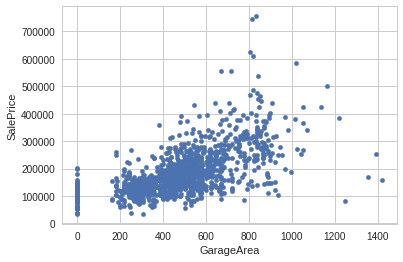

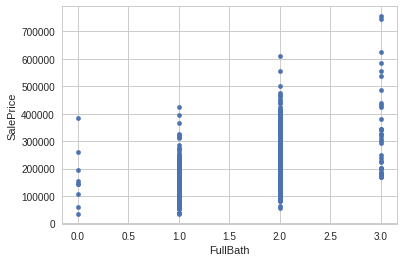

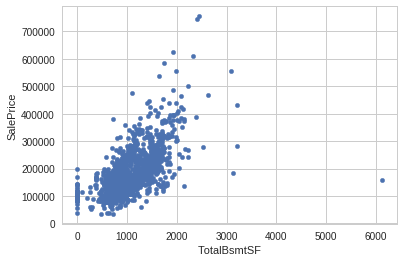

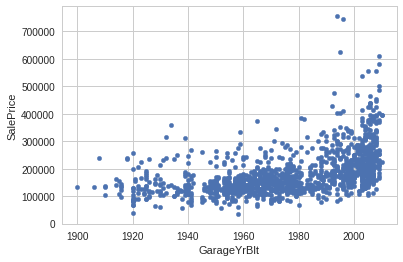

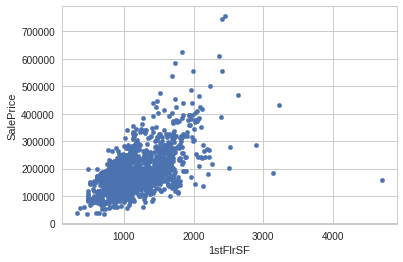

In [52]:
# Outlier detecting by graph
SalePrice_Linearity = corrmat['SalePrice'].nlargest(10).index
def relation(df, x, y):
    data = pd.concat([df[x], df[y]], axis=1)
    data.plot.scatter(x=x, y=y)

for c in SalePrice_Linearity:
    relation(train_df, c, 'SalePrice')
   

In [53]:
train_df.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [54]:
train_out = train_normal.copy()
test_out = test_normal.copy()

In [55]:
train, test = preScoreTest(train_out, test_out)

In [56]:
import statsmodels.api as sm
regressor = sm.OLS(train['SalePrice'], train.drop('SalePrice', axis=1)).fit()
result = regressor.outlier_test()

/home/lafes/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1804: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/lafes/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/home/lafes/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/lafes/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/lafes/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/lafes/anaconda3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:147: 

In [57]:
outlier = result['bonf(p)']
outlier = outlier[outlier<1e-3].index

In [58]:
train_out = train_normal.copy()
test_out = test_normal.copy()

In [59]:
#train_out = train_out.drop(train_out.index[[outlier]])
train_out = train_out.drop(train_out.index[[88,462,523,588,632,968,1298,1324]])

## Ensemble!

In [60]:
train, test = preScoreTest(train_out, test_out)

In [61]:
xgb = XGBRegressor(learning_rate=0.05, n_estimators=500, max_depth=3,
                   min_child_weight=1, colsample_bytree=0.4)
accuracies = cross_val_score(estimator = xgb, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.926230496407


In [62]:
xgb.fit(train.drop('SalePrice', axis=1), y=train['SalePrice'])
y_pred_xgb = xgb.predict(test)
submission = pd.DataFrame({
    'Id':test_df['Id'],
    'SalePrice':y_pred
})
submission.to_csv('sub_outlier', index=False)

## Linear Regression Again!

In [63]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [64]:
selector = SelectKBest(f_regression, k=150)
selector.fit(train.drop('SalePrice', axis=1), train['SalePrice'])
X = train[selector.get_support(indices=True)]

In [65]:
mlr = LinearRegression()
X = train[selector.get_support(indices=True)]
accuracies = cross_val_score(estimator = mlr, X = X, y = y, cv = 5, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.903129417695


In [66]:
mlr.fit(X, y)
test_mlr = test[selector.get_support(indices=True)]
y_pred_mlr = mlr.predict(test_mlr)

** That's an impressive performance gain after remove outliers in linear regression! **

## Lasso

In [67]:
train, test = preScoreTest(train_out, test_out)
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [68]:
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.1, normalize=True, max_iter=10)
accuracies = cross_val_score(estimator = las, X = X, y = y, cv = 5, n_jobs=-1)
print('CV score is:', accuracies.mean())

/home/lafes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/lafes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/lafes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/lafes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not conver

CV score is: 0.886374445054


In [69]:
las.fit(X, y)
y_pred_lasso = las.predict(test)

/home/lafes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Ridge Regression

In [70]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=10)
accuracies = cross_val_score(estimator = reg, X = X, y = y, cv = 5, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.908431522983


In [71]:
reg.fit(X, y)
y_pred_reg = reg.predict(test)

## BayesianRidge

In [72]:
from sklearn.linear_model import BayesianRidge
bayesian = BayesianRidge()
accuracies = cross_val_score(estimator = bayesian, X = X, y = y, cv = 5, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.908394314969


In [73]:
bayesian.fit(X, y)
y_pred_bayesian = bayesian.predict(test)

## Random Forest

In [74]:
rfg = RandomForestRegressor(n_estimators=500, random_state=0, n_jobs=-1)
accuracies = cross_val_score(estimator = rfg, X = X, y = y, cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.888482438072


In [75]:
rfg.fit(X,y)
y_pred_rfg = rfg.predict(test)

## ElasticNet

In [76]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1)
accuracies = cross_val_score(estimator = elastic, X = X, y = y, cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

/home/lafes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/lafes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/lafes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/lafes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not conver

CV score is: 0.906821080108


In [77]:
elastic.fit(X,y)
y_pred_elastic = elastic.predict(test)

/home/lafes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## OrthogonalMatchingPursuit

In [78]:
from sklearn.linear_model import OrthogonalMatchingPursuit
orth =OrthogonalMatchingPursuit()
accuracies = cross_val_score(estimator = orth, X = X, y = y, cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.904904028234


In [79]:
orth.fit(X, y)
y_pred_orth = orth.predict(test)

In [80]:
final_result = {'bayesian':y_pred_bayesian, 'elastic':y_pred_elastic, 'lasso':y_pred_lasso,
               'mlr':y_pred_mlr, 'orth':y_pred_orth, 'reg':y_pred_reg, 'rfg':y_pred_rfg,
               'xgb':y_pred_xgb}
final_result = pd.DataFrame(final_result)

In [81]:
corrmat = final_result.corr()
corrmat

,bayesian,elastic,lasso,mlr,orth,reg,rfg,xgb
bayesian,1.000000,0.997781,0.990708,0.996943,0.991792,0.999937,0.966709,0.979493
elastic,0.997781,1.000000,0.985311,0.993338,0.988557,0.997030,0.967944,0.978754
lasso,0.990708,0.985311,1.000000,0.989900,0.986014,0.991313,0.959184,0.972528
mlr,0.996943,0.993338,0.989900,1.000000,0.991333,0.997121,0.963097,0.976795
orth,0.991792,0.988557,0.986014,0.991333,1.000000,0.991809,0.963737,0.975447
reg,0.999937,0.997030,0.991313,0.997121,0.991809,1.000000,0.966205,0.979226
rfg,0.966709,0.967944,0.959184,0.963097,0.963737,0.966205,1.000000,0.985654
xgb,0.979493,0.978754,0.972528,0.976795,0.975447,0.979226,0.985654,1.000000


In [82]:
y_pred = (2*final_result['xgb']  + final_result['reg'] + final_result['elastic'] + 
          final_result['lasso'] + final_result['orth'])/6

In [83]:
submission = pd.DataFrame({
    'Id':test_df['Id'],
    'SalePrice':y_pred
})
submission.to_csv('sub_FINAL', index=False)

Weak esemble result due to similar algorithm.